In [91]:
import pandas as pd

In [92]:
tit = pd.read_csv("titanic.csv")

In [93]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [95]:
import seaborn as sns
sns.set()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

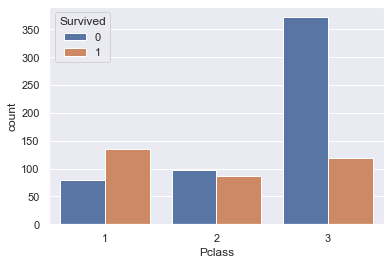

In [96]:
#analyzing association between class of passenger and survival rate;
sns.countplot(x="Pclass", data=tit, hue = 'Survived')

In [97]:
#percentage of passengers in 1st Class who survived;
(tit[(tit['Pclass'] == 1) & (tit['Survived'] == 1)]).count()['Survived'] / (tit[tit['Pclass'] == 1]).count()['Survived']

0.6296296296296297

In [98]:
#percentage of passengers in 2nd Class who survived;
(tit[(tit['Pclass'] == 2) & (tit['Survived'] == 1)]).count()['Survived'] / (tit[tit['Pclass'] == 2]).count()['Survived']

0.47282608695652173

In [99]:
#percentage of passengers in 3rd Class who survived;
(tit[(tit['Pclass'] == 3) & (tit['Survived'] == 1)]).count()['Survived'] / (tit[tit['Pclass'] == 3]).count()['Survived']

0.24236252545824846

<AxesSubplot:xlabel='Sex', ylabel='count'>

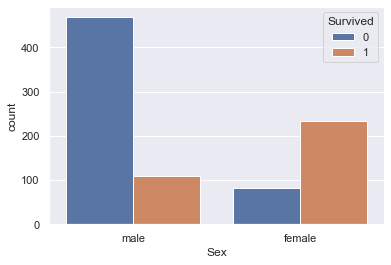

In [100]:
#analyzing association between gender and survival rate;
sns.countplot(x="Sex", data=tit, hue = 'Survived')

In [101]:
#percentage of male passengers who survived;
(tit[(tit['Sex'] == 'male') & (tit['Survived'] == 1)]).count()['Survived'] / (tit[tit['Sex'] == 'male']).count()['Survived']

0.18890814558058924

In [102]:
#percentage of female passengers who survived;
(tit[(tit['Sex'] == 'female') & (tit['Survived'] == 1)]).count()['Survived'] / (tit[tit['Sex'] == 'female']).count()['Survived']

0.7420382165605095

In [103]:
#removing missing values in Age;
tit.dropna(subset = ['Age'], inplace = True)
tit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [104]:
tit.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [105]:
tit['Age_bin']=pd.cut(x = tit['Age'],
                        bins = [0,14,24,64,80], 
                        labels = ['children', 'youth', 'adults', 'seniors'])
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,adults
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,adults
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,youth
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,adults


<AxesSubplot:xlabel='Age_bin', ylabel='count'>

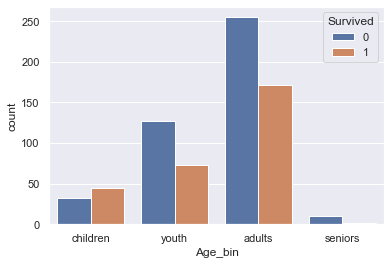

In [106]:
#analyzing association between age and survival rate;
sns.countplot(x="Age_bin", data=tit, hue = 'Survived')

In [107]:
#percentage of children who survived;
(tit[(tit['Age_bin'] == 'children') & (tit['Survived'] == 1)]).count()['Survived'] / (tit[tit['Age_bin'] == 'children']).count()['Survived']

0.5844155844155844

In [108]:
#percentage of youth who survived;
(tit[(tit['Age_bin'] == 'youth') & (tit['Survived'] == 1)]).count()['Survived'] / (tit[tit['Age_bin'] == 'youth']).count()['Survived']

0.365

In [109]:
#percentage of adults who survived;
(tit[(tit['Age_bin'] == 'adults') & (tit['Survived'] == 1)]).count()['Survived'] / (tit[tit['Age_bin'] == 'adults']).count()['Survived']

0.4014084507042254

In [110]:
#percentage of seniors who survived;
(tit[(tit['Age_bin'] == 'seniors') & (tit['Survived'] == 1)]).count()['Survived'] / (tit[tit['Age_bin'] == 'seniors']).count()['Survived']

0.09090909090909091